# Import libraries

In [2585]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures,LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

# Load & Read the data

In [2586]:
df = pd.read_csv("heart.csv")
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [2587]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


# Data Preprocessing

In [2588]:
missing_values = df.isnull().sum()
missing_values

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [2590]:
df = df.drop(columns=["id", "dataset"], axis=1)

In [2589]:
df.drop(columns=["ca"], inplace=True)

In [2591]:
df.dropna(inplace=True)

In [2592]:
'''num_cols = ["trestbps", "chol", "thalch", "oldpeak"]
for col in num_cols:
    df[col] = df[col].fillna(df[col].mean())
    

cat_cols = ["slope", "restecg", "exang"]
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0],  inplace=True)'''

'num_cols = ["trestbps", "chol", "thalch", "oldpeak"]\nfor col in num_cols:\n    df[col] = df[col].fillna(df[col].mean())\n    \n\ncat_cols = ["slope", "restecg", "exang"]\nfor col in cat_cols:\n    df[col] = df[col].fillna(df[col].mode()[0],  inplace=True)'

In [2593]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

In [2594]:
df.duplicated().sum()

0

In [2595]:
df.drop_duplicates(inplace=True)

In [2596]:
df.dtypes

age           int64
sex          object
cp           object
trestbps    float64
chol        float64
fbs          object
restecg      object
thalch      float64
exang        object
oldpeak     float64
slope        object
thal         object
num           int64
dtype: object

In [2597]:
categorical_cols = ["sex", "cp", "restecg", "exang", "slope","thal", "fbs"]

for col in categorical_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

In [2598]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,1,3,145.0,233.0,1,0,150.0,0,2.3,0,0,0
1,67,1,0,160.0,286.0,0,0,108.0,1,1.5,1,1,2
2,67,1,0,120.0,229.0,0,0,129.0,1,2.6,1,2,1
3,37,1,2,130.0,250.0,0,1,187.0,0,3.5,0,1,0
4,41,0,1,130.0,204.0,0,0,172.0,0,1.4,2,1,0


In [2599]:
df.dtypes

age           int64
sex           int32
cp            int32
trestbps    float64
chol        float64
fbs           int32
restecg       int32
thalch      float64
exang         int32
oldpeak     float64
slope         int32
thal          int32
num           int64
dtype: object

In [2600]:
X = df.iloc[:, :-1] 
y = df.iloc[:, -1] 

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Exploratory Data Analysis (EDA)

In [2601]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
count,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000
mean,54.757412,0.722372,0.857143,132.137466,215.469003,0.137466,0.644205,143.711590,0.396226,1.013747,1.336927,1.353100,1.083558
std,9.037186,0.448434,1.017985,17.930797,97.011484,0.344804,0.590545,25.961934,0.489773,1.118179,0.608241,0.621124,1.241631
min,29.000000,0.000000,0.000000,94.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-1.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,197.000000,0.000000,0.000000,125.000000,0.000000,0.000000,1.000000,1.000000,0.000000
50%,56.000000,1.000000,0.000000,130.000000,233.000000,0.000000,1.000000,147.000000,0.000000,0.800000,1.000000,1.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,270.500000,0.000000,1.000000,163.000000,1.000000,1.600000,2.000000,2.000000,2.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,2.000000,4.000000


In [2602]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 371 entries, 0 to 903
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       371 non-null    int64  
 1   sex       371 non-null    int32  
 2   cp        371 non-null    int32  
 3   trestbps  371 non-null    float64
 4   chol      371 non-null    float64
 5   fbs       371 non-null    int32  
 6   restecg   371 non-null    int32  
 7   thalch    371 non-null    float64
 8   exang     371 non-null    int32  
 9   oldpeak   371 non-null    float64
 10  slope     371 non-null    int32  
 11  thal      371 non-null    int32  
 12  num       371 non-null    int64  
dtypes: float64(4), int32(7), int64(2)
memory usage: 30.4 KB


In [2603]:
df['num'].value_counts()

num
0    171
1     82
3     52
2     50
4     16
Name: count, dtype: int64

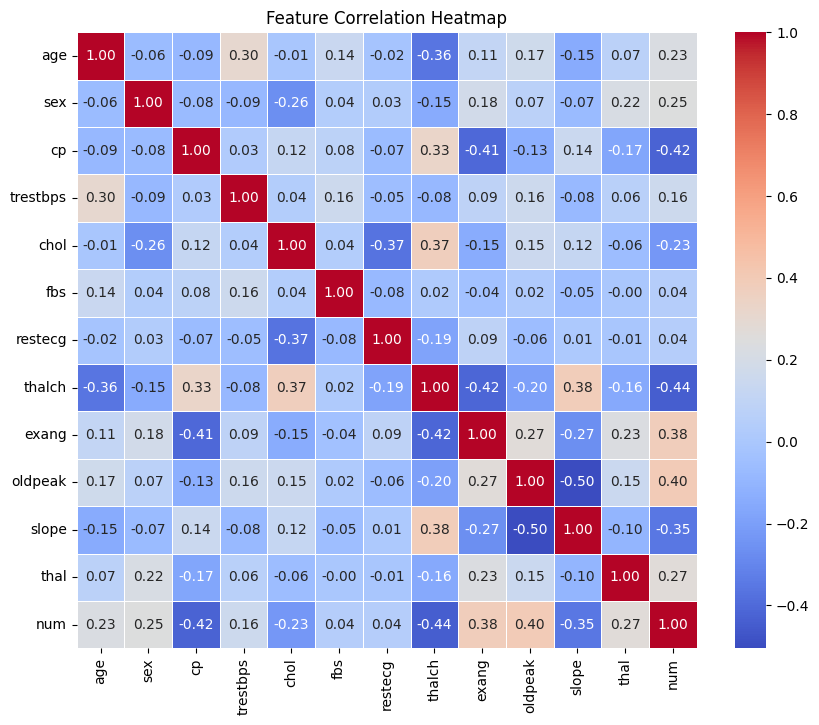

In [2604]:
corr_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [2605]:
y = df["num"]

In [2606]:
target_num = df.num.value_counts()

<Axes: xlabel='sex', ylabel='num'>

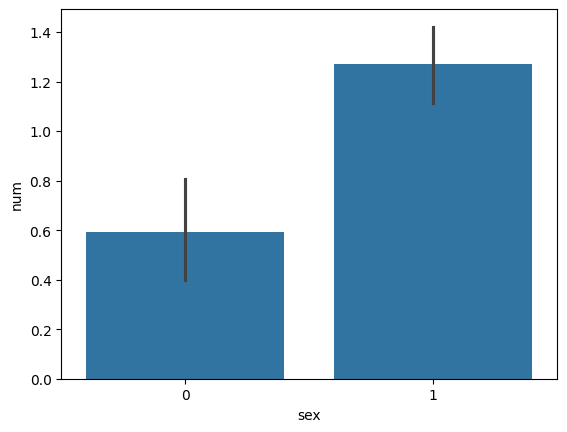

In [2607]:
df['sex'].unique()

sns.barplot(x=df['sex'], y=y)

In [2608]:
df.shape

(371, 13)

In [ ]:
#print("Percentage of patience without heart problems: "+str(round(target_num[0]*100/918, 2))+" %")
#heart_problem_count = target_num[1] + target_num[2] + target_num[3] + target_num[4]
#print("Percentage of patients with heart problems: " + str(round(heart_problem_count * 100 / 918, 2))+' %')

Percentage of patience without heart problems: 18.63 %
Percentage of patients with heart problems: 21.79 %


<Axes: xlabel='cp', ylabel='num'>

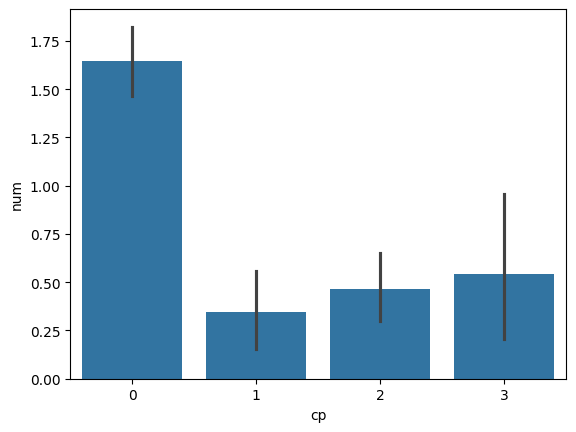

In [2610]:
sns.barplot(x=df['cp'], y=y)


<Axes: xlabel='restecg', ylabel='num'>

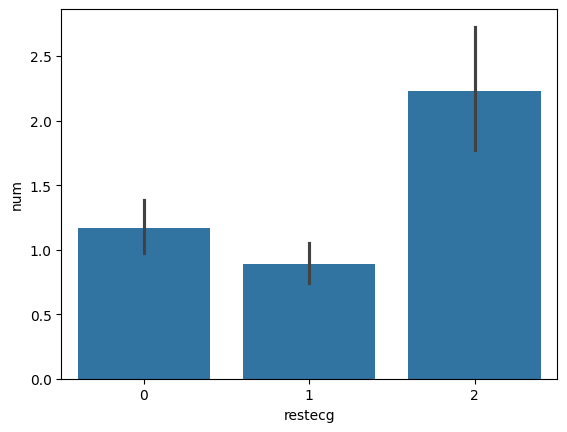

In [2611]:
sns.barplot(x=df['restecg'], y=y)

<Axes: xlabel='exang', ylabel='num'>

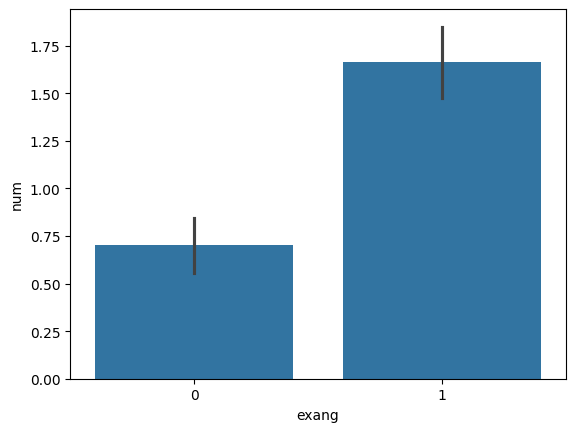

In [2612]:
sns.barplot(x=df['exang'], y=y)

<Axes: xlabel='slope', ylabel='num'>

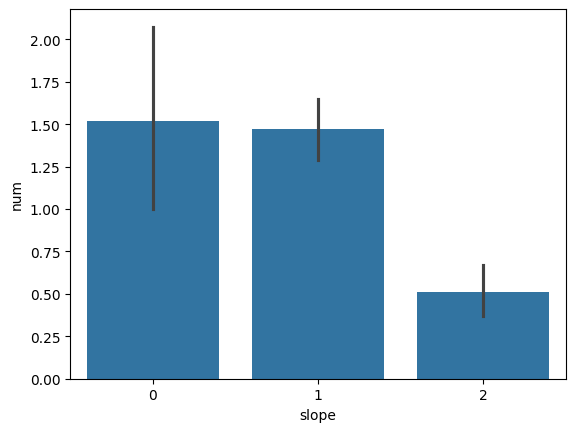

In [2613]:
sns.barplot(x=df['slope'], y=y)

# Feature Engineering

In [2614]:
correlation = df.corr()['num'].abs().sort_values(ascending=False)
print("Correlation with target variable (num):")
print(correlation)

Correlation with target variable (num):
num         1.000000
thalch      0.444459
cp          0.422463
oldpeak     0.399018
exang       0.380959
slope       0.352308
thal        0.266532
sex         0.245648
chol        0.232132
age         0.225093
trestbps    0.158876
restecg     0.044341
fbs         0.042540
Name: num, dtype: float64


In [2615]:
df['target'] = df['num'].apply(lambda x: 1 if x > 0 else 0)
df.drop(columns=['num'], inplace=True)

In [2616]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,target
count,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000
mean,54.757412,0.722372,0.857143,132.137466,215.469003,0.137466,0.644205,143.711590,0.396226,1.013747,1.336927,1.353100,0.539084
std,9.037186,0.448434,1.017985,17.930797,97.011484,0.344804,0.590545,25.961934,0.489773,1.118179,0.608241,0.621124,0.499143
min,29.000000,0.000000,0.000000,94.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-1.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,197.000000,0.000000,0.000000,125.000000,0.000000,0.000000,1.000000,1.000000,0.000000
50%,56.000000,1.000000,0.000000,130.000000,233.000000,0.000000,1.000000,147.000000,0.000000,0.800000,1.000000,1.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,270.500000,0.000000,1.000000,163.000000,1.000000,1.600000,2.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,2.000000,1.000000


In [2617]:
#df['heart_rate_reserve'] = (202 - df['age']) - df['thalch']
#df['high_bp'] = (df['trestbps'] > 140).astype(int)
#df['high_chol'] = (df['chol'] > 240).astype(int)

In [2618]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'thal', 'target'],
      dtype='object')

In [2619]:
X = df.drop('target', axis=1)
y = df['target']

In [2620]:
pca = PCA(n_components=0.90) 
X_pca = pca.fit_transform(X_scaled)

In [2621]:
print(f"Number of principal components selected: {X_pca.shape[1]}")

Number of principal components selected: 10


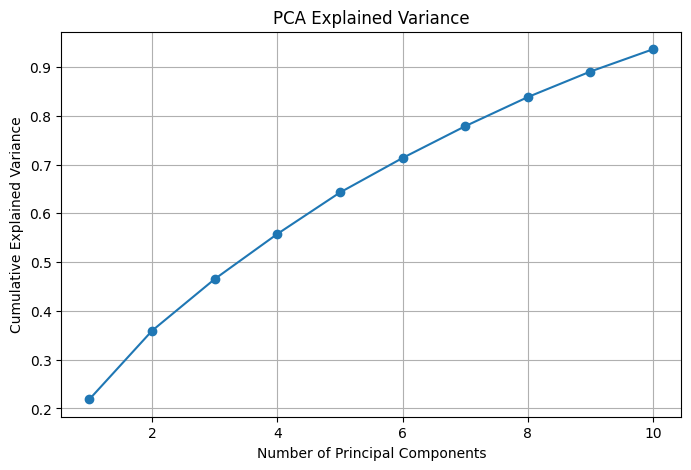

In [2622]:

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Explained Variance")
plt.grid()
plt.show()


# Split The Data into Train & Test

In [2623]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.4, random_state=42, stratify=y)

In [2624]:
X_train.shape, X_test.shape

((222, 10), (149, 10))

# Choose and Train a Model

In [2625]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [2626]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [2627]:
GB = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
GB.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [2628]:
SVC = SVC()
SVC.fit(X_train, y_train)

SVC()

In [2629]:
XGB = XGBClassifier()
XGB.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

# Hyperamter Tuning (Optimization)

In [2643]:
param_grid = {
    'n_estimators': [100, 300, 500, 700],
    'max_depth': [6, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_random = RandomizedSearchCV(RandomForestClassifier(random_state=42), 
                               param_distributions=param_grid, 
                               cv=5, scoring='accuracy', n_jobs=-1, 
                               n_iter=20, random_state=42)

rf_random.fit(X_train, y_train)
print(f"Best Params: {rf_random.best_params_}")

y_pred = rf_random.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("\nModel Accuracy after GridSearchCV:", accuracy)


Best Params: {'n_estimators': 700, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 6}

Model Accuracy after GridSearchCV: 0.87248322147651


# Model Prediction

In [2631]:
y_pred_lr = lr.predict(X_test)

In [2632]:
y_pred_rf = rf.predict(X_test)

In [2633]:
y_pred_GB = GB.predict(X_test)

In [2634]:
y_pred_SVC = SVC.predict(X_test)

In [2635]:
y_pred_XGB = XGB.predict(X_test)

# Evaluate the Model

In [2636]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

print("Classification Report:\n", classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Model Accuracy: 0.87
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.84      0.86        69
           1       0.87      0.90      0.88        80

    accuracy                           0.87       149
   macro avg       0.87      0.87      0.87       149
weighted avg       0.87      0.87      0.87       149

Confusion Matrix:
 [[58 11]
 [ 8 72]]


In [2637]:
accuracy = accuracy_score(y_test, y_pred_lr)
print(f"LR Model Accuracy: {accuracy:.2f}")

print("Classification Report:\n", classification_report(y_test, y_pred_lr))

conf_matrix = confusion_matrix(y_test, y_pred_lr)
print("Confusion Matrix:\n", conf_matrix)

LR Model Accuracy: 0.84
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.81      0.82        69
           1       0.84      0.86      0.85        80

    accuracy                           0.84       149
   macro avg       0.84      0.84      0.84       149
weighted avg       0.84      0.84      0.84       149

Confusion Matrix:
 [[56 13]
 [11 69]]


In [2644]:
accuracy = accuracy_score(y_test, y_pred_rf)
print(f"RF Model Accuracy: {accuracy:.2f}")

print("Classification Report:\n", classification_report(y_test, y_pred_rf))

conf_matrix = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:\n", conf_matrix)

RF Model Accuracy: 0.87
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.83      0.85        69
           1       0.86      0.90      0.88        80

    accuracy                           0.87       149
   macro avg       0.87      0.86      0.86       149
weighted avg       0.87      0.87      0.87       149

Confusion Matrix:
 [[57 12]
 [ 8 72]]


In [2639]:
accuracy = accuracy_score(y_test, y_pred_GB)
print(f"GB Model Accuracy: {accuracy:.2f}")

print("Classification Report:\n", classification_report(y_test, y_pred_GB))

conf_matrix = confusion_matrix(y_test, y_pred_GB)
print("Confusion Matrix:\n", conf_matrix)

GB Model Accuracy: 0.85
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.80      0.83        69
           1       0.84      0.90      0.87        80

    accuracy                           0.85       149
   macro avg       0.86      0.85      0.85       149
weighted avg       0.85      0.85      0.85       149

Confusion Matrix:
 [[55 14]
 [ 8 72]]


In [2640]:
accuracy = accuracy_score(y_test, y_pred_SVC)
print(f"SVC Model Accuracy: {accuracy:.2f}")

print("Classification Report:\n", classification_report(y_test, y_pred_SVC))

conf_matrix = confusion_matrix(y_test, y_pred_SVC)
print("Confusion Matrix:\n", conf_matrix)

SVC Model Accuracy: 0.87
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.81      0.85        69
           1       0.85      0.91      0.88        80

    accuracy                           0.87       149
   macro avg       0.87      0.86      0.86       149
weighted avg       0.87      0.87      0.87       149

Confusion Matrix:
 [[56 13]
 [ 7 73]]


In [2641]:
accuracy = accuracy_score(y_test, y_pred_XGB)
print(f"XGB Model Accuracy: {accuracy:.2f}")

print("Classification Report:\n", classification_report(y_test, y_pred_XGB))

conf_matrix = confusion_matrix(y_test, y_pred_XGB)
print("Confusion Matrix:\n", conf_matrix)

XGB Model Accuracy: 0.85
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.81      0.84        69
           1       0.85      0.89      0.87        80

    accuracy                           0.85       149
   macro avg       0.85      0.85      0.85       149
weighted avg       0.85      0.85      0.85       149

Confusion Matrix:
 [[56 13]
 [ 9 71]]


In [2649]:
import joblib

joblib.dump(SVC, "wine_classifier_pca.pkl")

loaded_model = joblib.load("wine_classifier_pca.pkl")

y_pred_loaded = loaded_model.predict(X_test)
print("Loaded Model Accuracy:", accuracy_score(y_test, y_pred_loaded))

Loaded Model Accuracy: 0.8657718120805369


In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(SVC, X_train, y_train, cv=5, scoring='accuracy')
print(f'Cross-Validation Accuracy Scores: {cv_scores}')
print(f'Mean Cross-Validation Accuracy: {np.mean(cv_scores):.2f}')